In [462]:
# Step2: 根据训练好的模型clark-y-cnn.h5，加载模型并预测
from tensorflow.keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [463]:
# Load the model from the file
model = load_model(r'E:\airfoil_tools\airfoil_ann\trained_model\clark-y-cnn-MaxAbsScaler.h5')
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_69 (Dense)            (None, 256)               1024      
                                                                 
 dense_70 (Dense)            (None, 128)               32896     
                                                                 
 dense_71 (Dense)            (None, 64)                8256      
                                                                 
 dense_72 (Dense)            (None, 32)                2080      
                                                                 
 dense_73 (Dense)            (None, 16)                528       
                                                                 
 dense_74 (Dense)            (None, 8)                 136       
                                                                 
 dense_75 (Dense)            (None, 3)               

In [464]:
# train the model on the Clark-Y airfoil database 
# Reynolds: 1000-1000000, Mach: 0.1-0.7, and AOA: -3-15 degrees

# Load the data
df = pd.read_csv(r'E:\airfoil_tools\airfoil_ann\input\clark-y-3.csv')

# Filter the data
filtered_df = df[
    (df['Reynold'] >= 0.1e4) & (df['Reynold'] <= 10e5) &  # 雷诺数范围
    (df['Mach'] >= 0.1) & (df['Mach'] <= 0.7) &            # 马赫数范围
    (df['Alpha'] >= -3) & (df['Alpha'] <= 15)              # 迎角范围
]

# Split the data into inputs (X) and outputs (y)
X = filtered_df[['Reynold', 'Mach', 'Alpha']].values
y = filtered_df[['cl', 'cd', 'cm']].values

In [465]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [466]:
# Define scaler 
scaler = MaxAbsScaler()
scalery = MaxAbsScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

y_train = scalery.fit_transform(y_train)
y_test = scalery.transform(y_test)

4/4 [==============================] - 0s 2ms/step


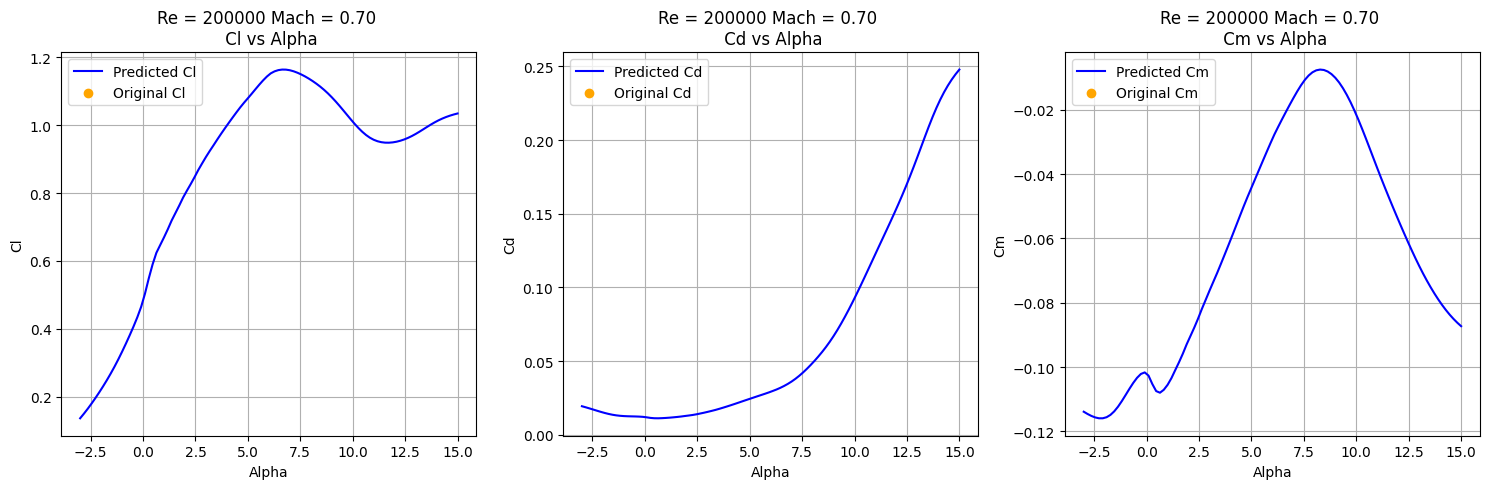

4/4 [==============================] - 0s 997us/step


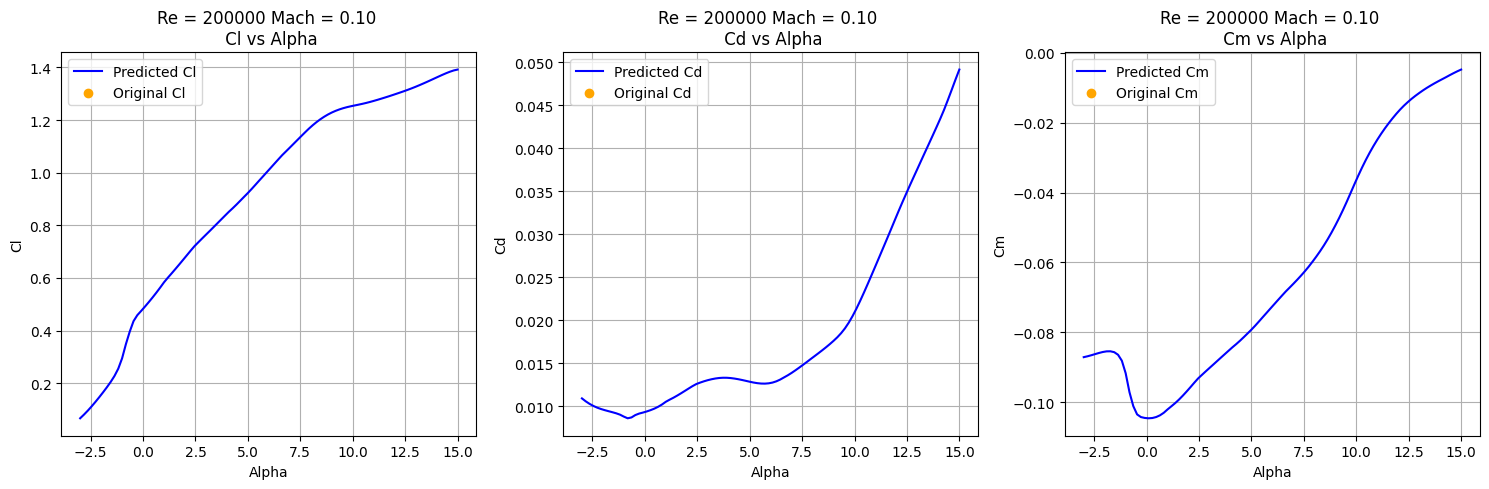

4/4 [==============================] - 0s 2ms/step


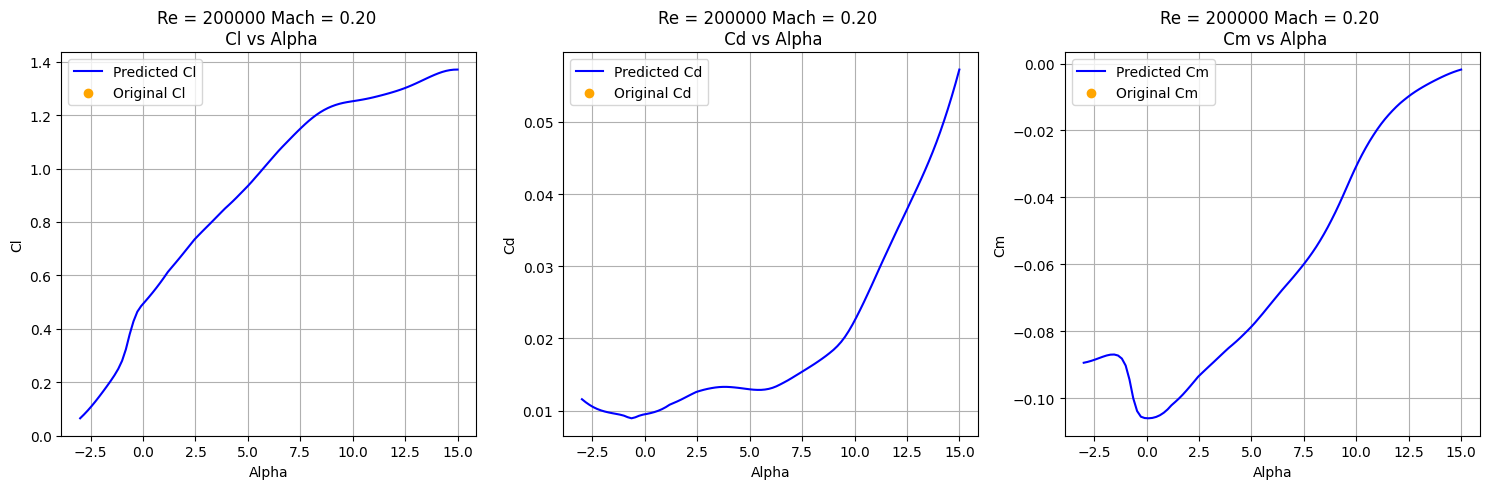

4/4 [==============================] - 0s 1ms/step


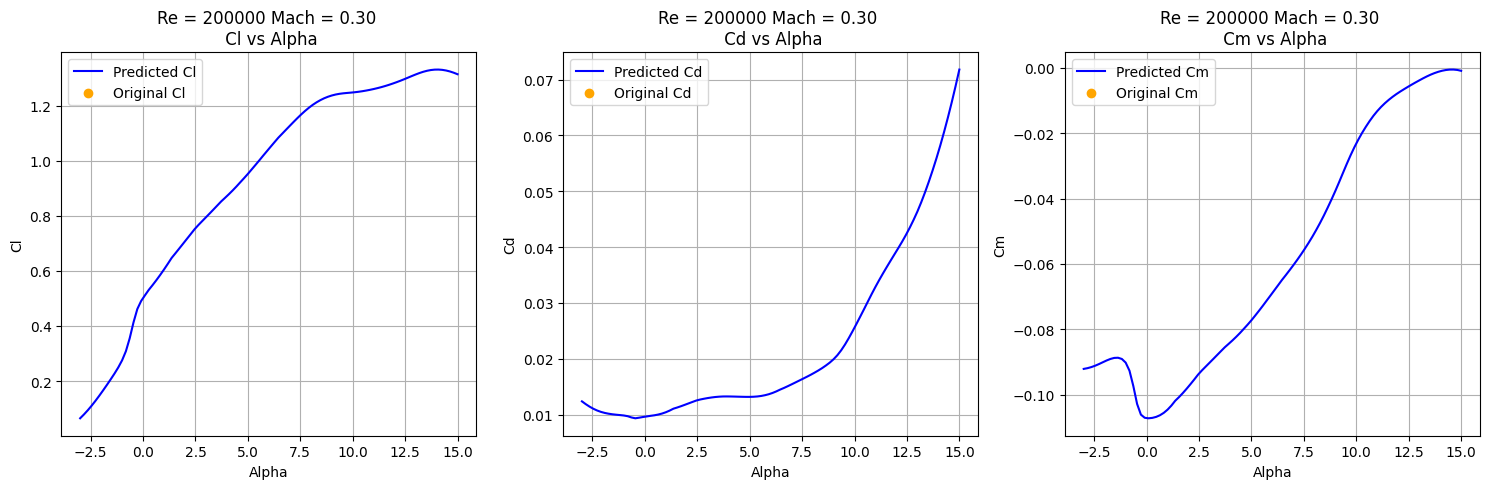

4/4 [==============================] - 0s 1ms/step


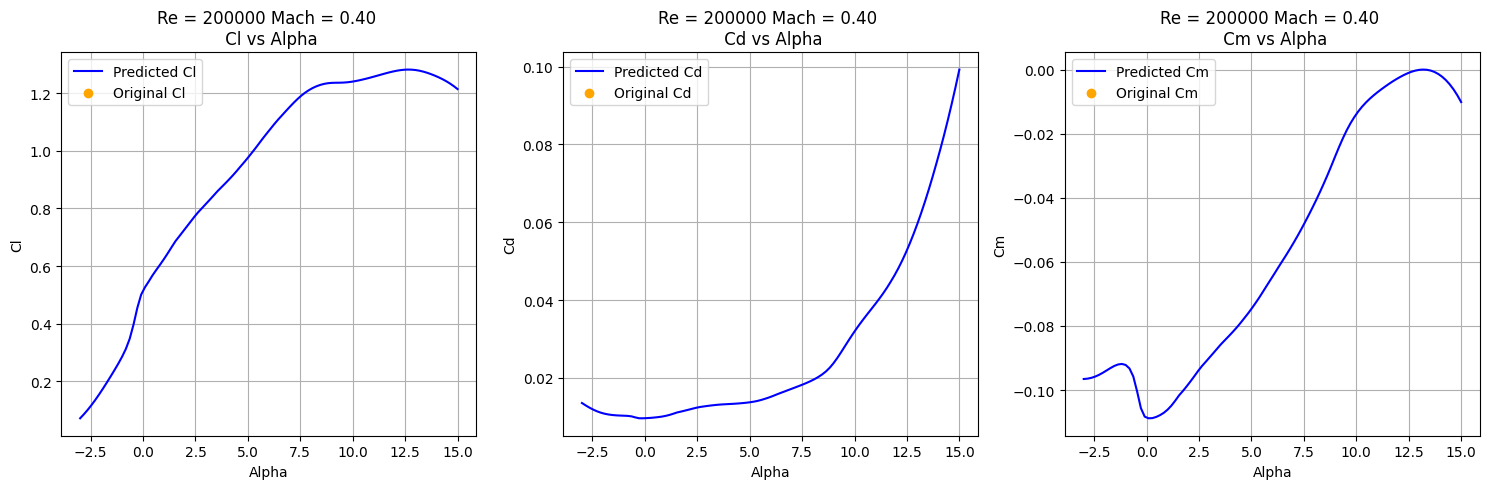

4/4 [==============================] - 0s 2ms/step


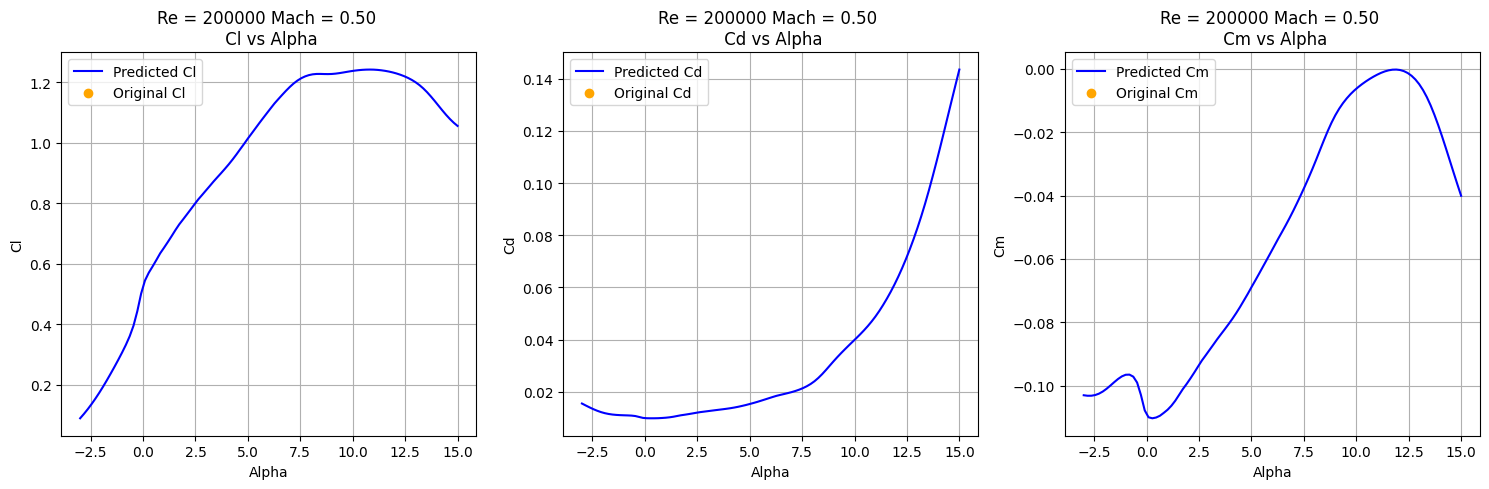

4/4 [==============================] - 0s 3ms/step


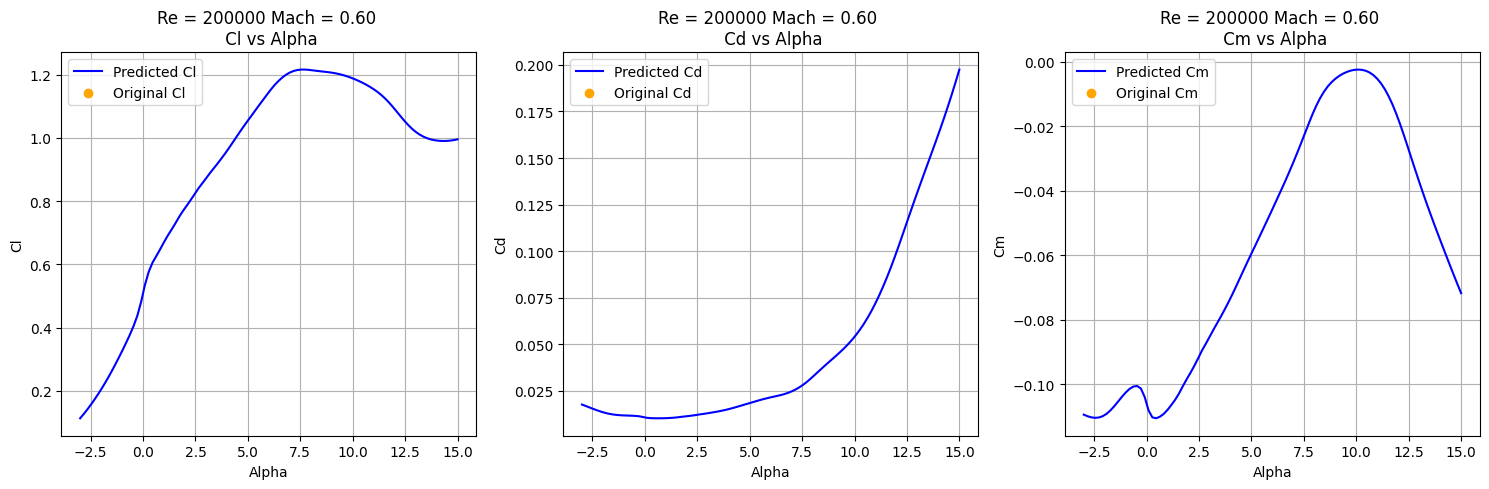

4/4 [==============================] - 0s 2ms/step


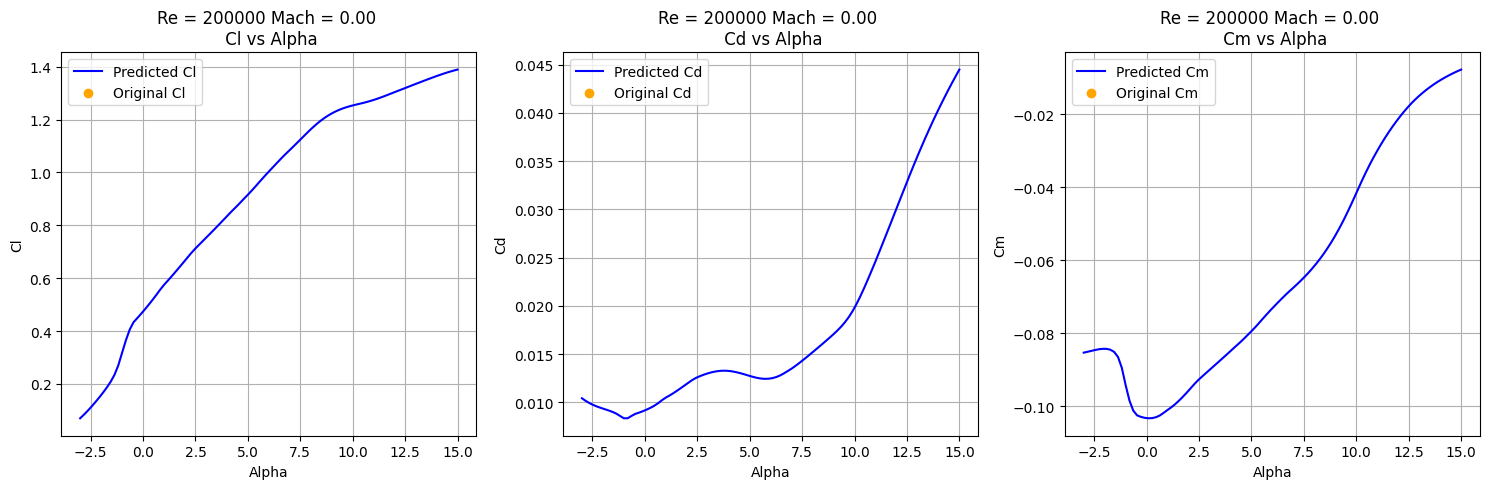

In [467]:
# Desired alpha compared to original data
desire_re = 20e4
desire_machs = [0.7, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.0]
alpha_values = np.linspace(-3, 15, 100)

# new X
for i in range(len(desire_machs)):
    desire_mach = desire_machs[i]
    new_X = np.array([[desire_re, desire_mach, alpha] for alpha in alpha_values])
    new_X_scaled = scaler.transform(new_X)

    # use model to predict new values
    predictions = model.predict(new_X_scaled)
    predictions = scalery.inverse_transform(predictions)

    # extract predicted Cl, Cd
    predicted_cl = predictions[:, 0]
    predicted_cd = predictions[:, 1]
    predicted_cm = predictions[:, 2]

    # original data
    filtered_df = df[(df['Reynold'] == desire_re) & (df['Mach'] == desire_mach)]
    original_alpha = filtered_df['Alpha'].values
    original_cl = filtered_df['cl'].values
    original_cd = filtered_df['cd'].values
    original_cm = filtered_df['cm'].values

    # plotting
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 3, 1)    # Cl
    plt.plot(alpha_values, predicted_cl, label='Predicted Cl', color='blue')
    plt.scatter(original_alpha, original_cl, label='Original Cl', color='orange')
    plt.title(f'Re = {desire_re:.0f} Mach = {desire_mach:.2f} \n Cl vs Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Cl')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 3, 2)    # Cd
    plt.plot(alpha_values, predicted_cd, label='Predicted Cd', color='blue')
    plt.scatter(original_alpha, original_cd, label='Original Cd', color='orange')
    plt.title(f'Re = {desire_re:.0f} Mach = {desire_mach:.2f} \n Cd vs Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Cd')
    plt.legend()
    plt.grid(True)
    
    plt.subplot(1, 3, 3)    # Cm
    plt.plot(alpha_values, predicted_cm, label='Predicted Cm', color='blue')
    plt.scatter(original_alpha, original_cm, label='Original Cm', color='orange')
    plt.title(f'Re = {desire_re:.0f} Mach = {desire_mach:.2f} \n Cm vs Alpha')
    plt.xlabel('Alpha')
    plt.ylabel('Cm')
    plt.legend()
    plt.grid(True)
 
    plt.tight_layout()

    # Save as SVG
    plt.savefig(rf'E:\airfoil_tools\airfoil_ann\output\MaxAbsScaler_model_re_{desire_re:.0f}_mach_{desire_mach:.2f}.svg', format='svg', dpi=1200)
    plt.show()
    plt.close()

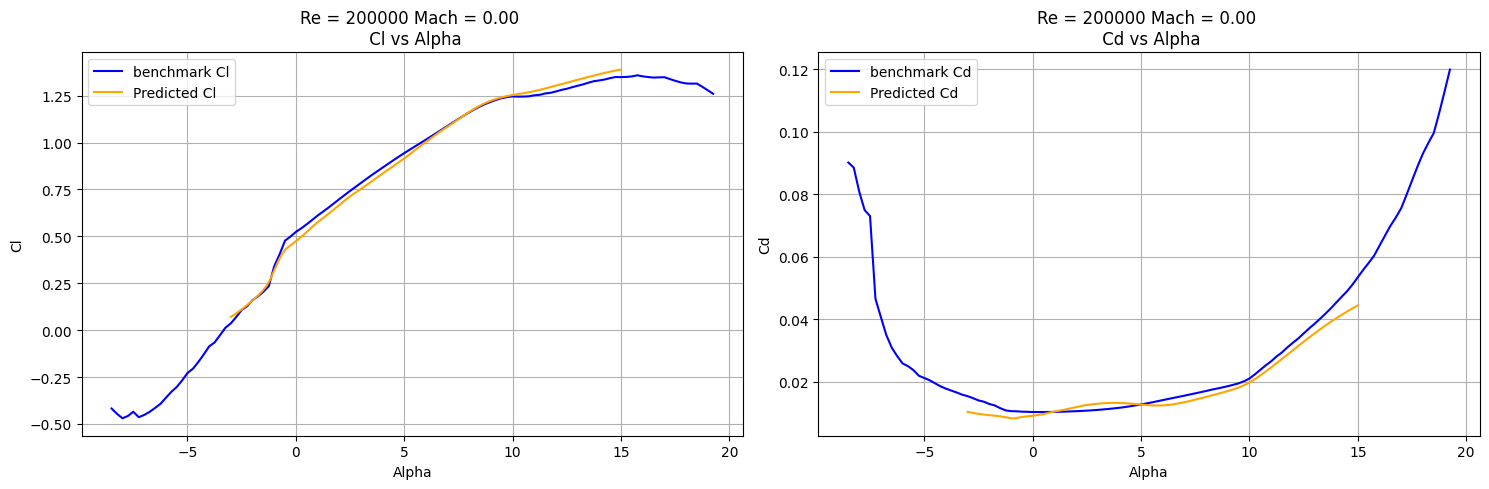

In [468]:
# Desired alpha compare to banchmark data

## benchmark\xf-clarkysm-il-500000.csv
df = pd.read_csv(r'E:\airfoil_tools\airfoil_ann\benchmark\xf-clarkysm-il-200000.csv', skiprows=10)

# plotting
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)    # Cl
plt.plot(df['Alpha'], df['Cl'], label='benchmark Cl', color='blue')
plt.plot(alpha_values, predicted_cl, label='Predicted Cl', color='orange')
plt.title(f'Re = {desire_re:.0f} Mach = {desire_mach:.2f} \n Cl vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Cl')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)    # Cd
plt.plot(df['Alpha'], df['Cd'], label='benchmark Cd', color='blue')
plt.plot(alpha_values, predicted_cd, label='Predicted Cd', color='orange')
plt.title(f'Re = {desire_re:.0f} Mach = {desire_mach:.2f} \n Cd vs Alpha')
plt.xlabel('Alpha')
plt.ylabel('Cd')
plt.legend()
plt.grid(True)

plt.tight_layout()

# Save as SVG
plt.savefig(rf"E:\airfoil_tools\airfoil_ann\output\benchmark_model_re_{desire_re:.0f}_mach_{desire_mach:.2f}.svg", format='svg', dpi=1200)

plt.show()
plt.close()